# Continuous matrix completion: experiments

In [56]:
from utils import *
import matplotlib.pyplot as plt

## Recovering synthetic data using standard matrix completion

### Tuning the learning rate for SGD

In [ ]:
A = syntheticA(175)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 2
p = 1/3
B = 80

In [ ]:
data = []
lr_list = [2**i for i in range(7)]

for lr in lr_list:
    I = bernoulli(A, p)
    X, Y = initial(A, r)
    data.append(optimise(X, Y, A, I, lr=lr, true_err_fn=true_err_fn, B=B, dk=1000, K=10000))
   

Best mean completion error: 0.4041849672794342
Best mean completion error: 0.40570226311683655
Best mean completion error: 3.555855698778032e-07
Best mean completion error: 1.6029683536089578e-07
Best mean completion error: 7.386243794371694e-08
Best mean completion error: 6.935552931963684e-08
Best mean completion error: 0.5533740520477295


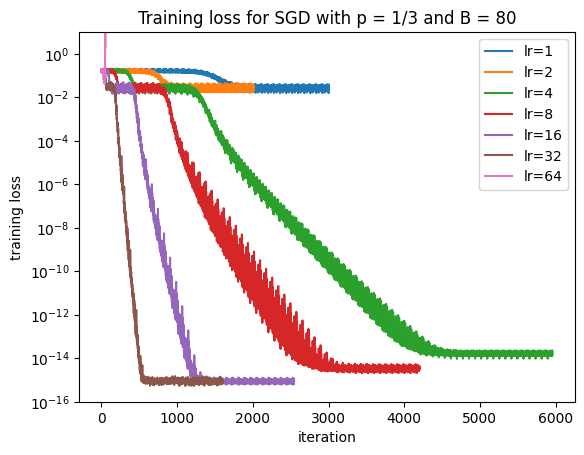

In [ ]:
for i in range(len(data)):
    plt.semilogy(data[i]["train_loss_list"], label=f"lr={2**i}")
plt.title(f"Training loss for SGD with p = 1/3 and B = {B}")
plt.xlabel("iteration")
plt.ylabel("training loss")
plt.ylim((1e-16,1e1))
plt.legend(loc="upper right")

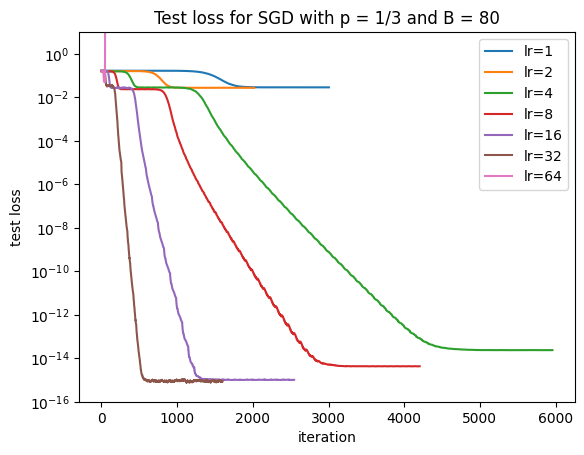

In [8]:
for i in range(len(data)):
    plt.semilogy(data[i]["test_loss_list"], label=f"lr={2**i}")
plt.title(f"Test loss for SGD with p = 1/3 and B = {B}")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.ylim((1e-16,1e1))
plt.legend(loc="upper right")

### Comparing the test loss and mean completion error

In [7]:
A = syntheticA(175)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 2
p = 1/3
B = 80
I = bernoulli(A, p)

In [8]:
# SGD
X, Y = initial(A,r) 
res_sgd_syn = optimise(X, Y, A, I, lr=32, true_err_fn=true_err_fn, B=B, dk=1000, K=3000, k_true=1)

Best mean completion error: 6.810110164678917e-08


In [9]:
# Adam
X, Y = initial(A, r)
res_adam_syn = optimise(X, Y, A, I, "adam", lr=0.01, true_err_fn=true_err_fn, B=B, dk=1000, K=3000, k_true=1)

Best mean completion error: 2.7468948360365175e-07


In [10]:
# ASD
X, Y = initial(A, r)
res_asd_syn = asd(X, Y,A, I, true_err_fn=true_err_fn, B=B, dk=1000, K=3000, k_true=1)

Best mean completion error: 1.3230601325631142e-07


(1e-16, 100.0)

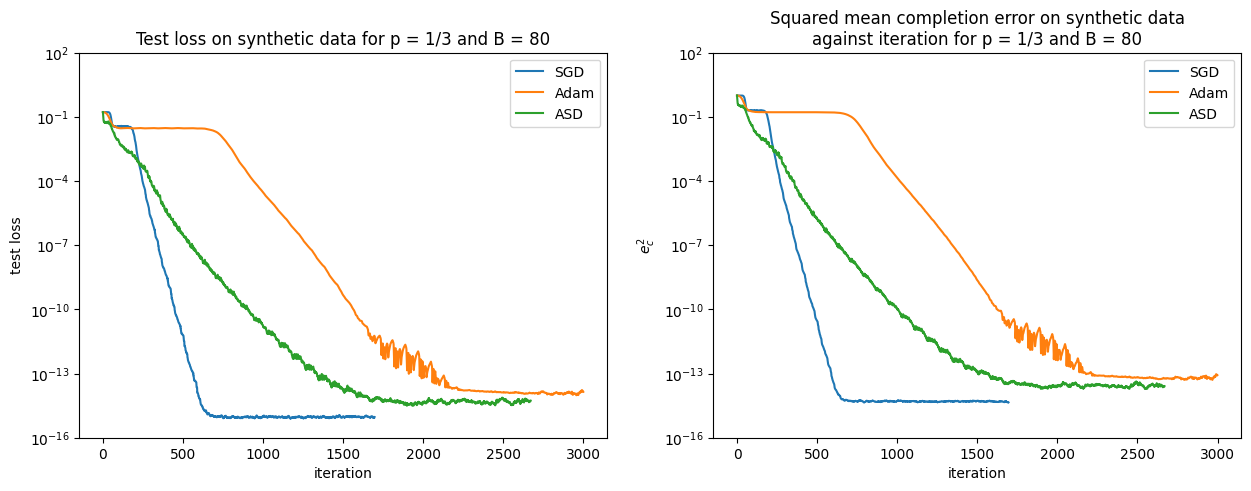

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
loss_str = "test_loss_list"
ax.semilogy(res_sgd_syn[loss_str], label="SGD")
ax.semilogy(res_adam_syn[loss_str], label="Adam")
ax.semilogy(res_asd_syn[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Test loss on synthetic data for p = 1/3 and B = {B}")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")
ax.set_ylim((1e-16, 1e2))

ax = fig.add_subplot(1,2,2)
loss_str = "true_err_list"
ax.semilogy(np.array(res_sgd_syn[loss_str])**2, label="SGD")
ax.semilogy(np.array(res_adam_syn[loss_str])**2, label="Adam")
ax.semilogy(np.array(res_asd_syn[loss_str])**2, label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Squared mean completion error on synthetic data\nagainst iteration for p = 1/3 and B = {B}")
ax.set_xlabel("iteration")
ax.set_ylabel(r"$e_{c}^{2}$")
ax.set_ylim((1e-16, 1e2))

### Testing the effect of over-estimating the rank

In [ ]:
A = syntheticA(60)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
p = 1/3
B = 10
K = 4000
dk = 250
k_test = 250
I = bernoulli(A, p)

In [ ]:
# SGD.
sgd_mean_syn_list = []
sgd_sd_syn_list = []
for r in range(1,26):
    err_list = []
    print(f"Rank: {r}")
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = optimise(X, Y, A, I, lr=32, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    sgd_mean_syn_list.append(np.mean(err_list).item())
    sgd_sd_syn_list.append(np.std(err_list).item())

In [ ]:
# Adam.
adam_mean_syn_list = []
adam_sd_syn_list = []
for r in range(1,26):
    err_list = []
    print(f"Rank: {r}")
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = optimise(X, Y, A, I, "adam", lr=0.02, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    adam_mean_syn_list.append(np.mean(err_list).item())
    adam_sd_syn_list.append(np.std(err_list).item())

In [ ]:
# Mini-batch ASD 1.
asd1_mean_syn_list = []
asd1_sd_syn_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    asd1_mean_syn_list.append(np.mean(err_list).item())
    asd1_sd_syn_list.append(np.std(err_list).item())

In [ ]:
# Mini-batch ASD 2.
asd2_mean_syn_list = []
asd2_sd_syn_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, db=B//2, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    asd2_mean_syn_list.append(np.mean(err_list).item())
    asd2_sd_syn_list.append(np.std(err_list).item())

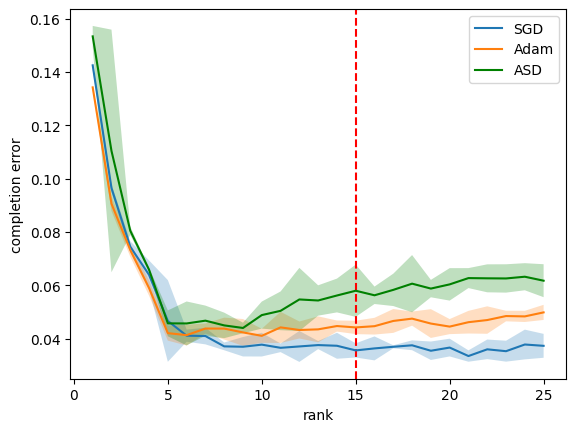

In [ ]:
plt.axvline(x=15, ls='--', c='red')

# SGD
plt.plot(np.arange(1,26),sgd_mean_syn_list, label="SGD")
sgd_upper = np.array(sgd_mean_syn_list) + 1.96 * np.array(sgd_sd_syn_list)
sgd_lower = np.array(sgd_mean_syn_list) - 1.96 * np.array(sgd_sd_syn_list)
plt.fill_between(np.arange(1,26),sgd_lower, sgd_upper, alpha=0.25)

# Adam
plt.plot(np.arange(1,26),adam_mean_syn_list, label="Adam")
adam_upper = np.array(adam_mean_syn_list) + 1.96 * np.array(adam_sd_syn_list)
adam_lower = np.array(adam_mean_syn_list) - 1.96 * np.array(adam_sd_syn_list)
plt.fill_between(np.arange(1,26),adam_lower, adam_upper, alpha=0.25)

# Mini-batch ASD 1
plt.plot(np.arange(1,26),asd1_mean_syn_list, "m", label="Mini-batch ASD 1")
asd_upper = np.array(asd1_mean_syn_list) + 1.96 * np.array(asd1_sd_syn_list)
asd_lower = np.array(asd1_mean_syn_list) - 1.96 * np.array(asd1_sd_syn_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="m", alpha=0.25)

# Mini-batch ASD 2
plt.plot(np.arange(1,26),asd2_mean_syn_list, "g", label="ASD")
asd_upper = np.array(asd2_mean_syn_list) + 1.96 * np.array(asd2_sd_syn_list)
asd_lower = np.array(asd2_mean_syn_list) - 1.96 * np.array(asd2_sd_syn_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="g", alpha=0.25)

plt.title("Completion error against rank\nwith 95% asymptotic confidence interval")
plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")

## Recovering spectromicroscopy data using standard matrix completion

### Effects of mini-batching

#### Comparing all the algorithms with and without mini-batching

In [49]:
file = np.load("CW2.npz")
A = torch.tensor(file["Y"], dtype=torch.float32).reshape((25**2, 49))
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 5
p = 1/3
B = 40
K = 3000
k_test = 250
I = bernoulli(A, p)

In [ ]:
# SGD without mini-batching.
X, Y = initial(A, r) 
res_sgd_real_b1 = optimise(X, Y, A, I, lr=32, true_err_fn=true_err_fn, B=1, dk=K, K=K, k_test=k_test)

In [35]:
# Adam without mini-batching.
X, Y = initial(A, r) 
res_adam_real_b1 = optimise(X, Y, A, I, "adam", lr=0.1, true_err_fn=true_err_fn, B=1, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.041154734790325165


In [36]:
# ASD without mini-batching.
X, Y = initial(A, r) 
res_asd_real_b1 = asd(X, Y, A, I, true_err_fn=true_err_fn, B=1, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.04328937828540802


In [22]:
# SGD with B mini-batches.
X, Y = initial(A, r) 
res_sgd_real_B = optimise(X, Y, A, I, lr=8, true_err_fn=true_err_fn, B=B, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.0439569316804409


In [32]:
# Adam with B mini-batches.
X, Y = initial(A, r) 
res_adam_real_B = optimise(X, Y, A, I, "adam", lr=0.02, true_err_fn=true_err_fn, B=B, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.05575871095061302


In [24]:
# Mini-batch ASD 2 with B mini-batches.
X, Y = initial(A, r) 
res_asd_real_B = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, db=B//2, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.05263651907444


Text(0, 0.5, 'test loss')

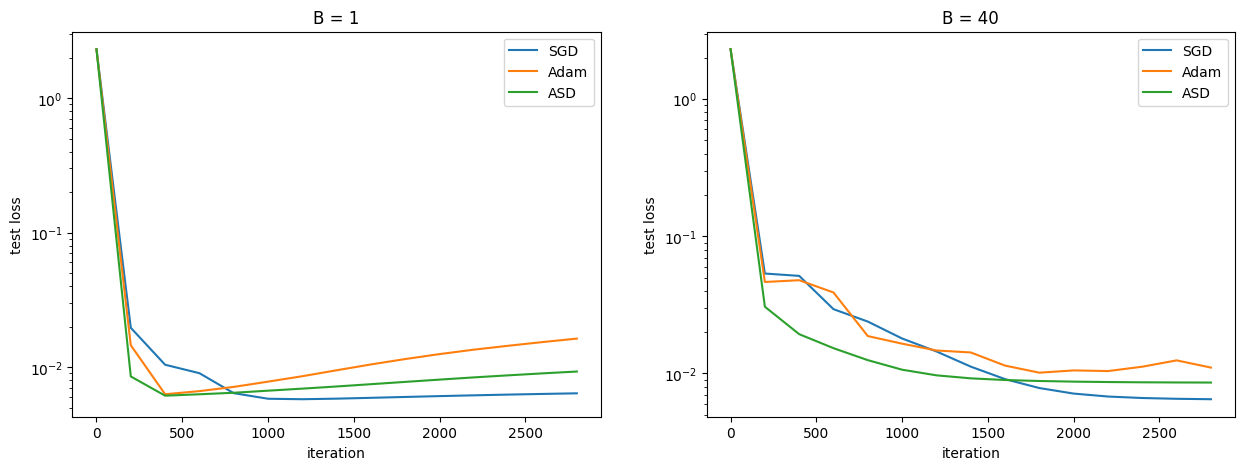

In [37]:
loss_str = "test_loss_list"
index_arr = np.arange(0, K, k_test)
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
ax.semilogy(index_arr, res_sgd_real_b1[loss_str], label="SGD")
ax.semilogy(index_arr, res_adam_real_b1[loss_str], label="Adam")
ax.semilogy(index_arr, res_asd_real_b1[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title("B = 1")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
ax.semilogy(index_arr, res_sgd_real_B[loss_str], label="SGD")
ax.semilogy(index_arr, res_adam_real_B[loss_str], label="Adam")
ax.semilogy(index_arr, res_asd_real_B[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = {B}")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

(-0.25, 8.0)

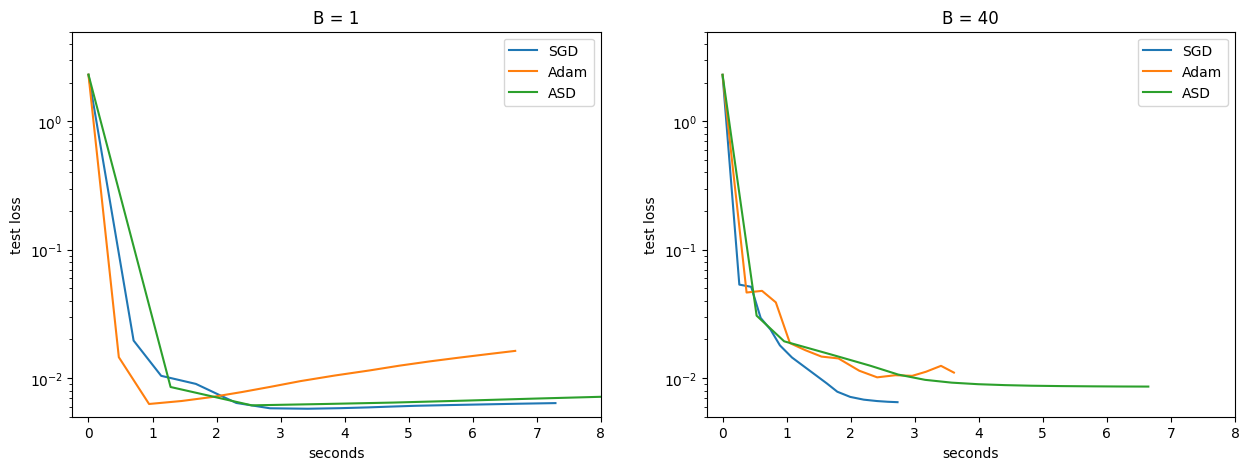

In [41]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
index_arr = np.arange(0, K, k_test)

ax = fig.add_subplot(1,2,1)
ax.semilogy(np.array(res_sgd_real_b1["timestamps"])[index_arr] - res_sgd_real_b1["timestamps"][0], 
            res_sgd_real_b1[loss_str], 
            label="SGD")
ax.semilogy(np.array(res_adam_real_b1["timestamps"])[index_arr] - res_adam_real_b1["timestamps"][0], 
            res_adam_real_b1[loss_str], 
            label="Adam")
ax.semilogy(np.array(res_asd_real_b1["timestamps"])[index_arr] - res_asd_real_b1["timestamps"][0], 
            res_asd_real_b1[loss_str], 
            label="ASD")
ax.legend(loc="upper right")
ax.set_title("B = 1")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((5e-3,5))
ax.set_xlim((-0.25,8))

ax = fig.add_subplot(1,2,2)
ax.semilogy(np.array(res_sgd_real_B["timestamps"])[index_arr] - res_sgd_real_B["timestamps"][0], 
            res_sgd_real_B[loss_str], 
            label="SGD")
ax.semilogy(np.array(res_adam_real_B["timestamps"])[index_arr] - res_adam_real_B["timestamps"][0], 
            res_adam_real_B[loss_str], 
            label="Adam")
ax.semilogy(np.array(res_asd_real_B["timestamps"])[index_arr] - res_asd_real_B["timestamps"][0], 
            res_asd_real_B[loss_str], 
            label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = {B}")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((5e-3,5))
ax.set_xlim((-0.25,8))

#### Comparing SGD and Adam for various numbers of mini-batches

In [52]:
file = np.load("CW2.npz")
A = torch.tensor(file["Y"], dtype=torch.float32).reshape((25**2, 49))
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 5
p = 1/3
B = 40
K = 4000
k_test = 250
B_list = [1, 10, 20, 40, 80]
I = bernoulli(A, p)

In [53]:
# SGD.
sgd_batch_list = []
for B in B_list:
    X, Y = initial(A, r)  
    sgd_batch_list.append(optimise(X, Y, A, I, lr=8, true_err_fn=true_err_fn, B=B, dk=K, K=K))

Best mean completion error: 0.04254498705267906
Best mean completion error: 0.043077804148197174
Best mean completion error: 0.04318920895457268
Best mean completion error: 0.04373517259955406
Best mean completion error: 0.047283850610256195


In [47]:
# Adam.
adam_batch_list = []
for B in B_list:
    X, Y = initial(A, r) 
    adam_batch_list.append(optimise(X, Y, A, I, "adam", lr=0.01, true_err_fn=true_err_fn, B=B, dk=K, K=K))

Best mean completion error: 0.04145660623908043
Best mean completion error: 0.04136733338236809
Best mean completion error: 0.043284572660923004
Best mean completion error: 0.044859688729047775
Best mean completion error: 0.06729103624820709


In [ ]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
for i in range(len(sgd_batch_list)):
    ax.semilogy(np.array(sgd_batch_list[i]["timestamps"]) - sgd_batch_list[i]["timestamps"][0], 
                 sgd_batch_list[i][loss_str], 
                 label=f"B = {B_list[i]}")
ax.legend(loc="upper right")
ax.set_title("SGD")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
for i in range(len(adam_batch_list)):
    ax.semilogy(np.array(adam_batch_list[i]["timestamps"]) - adam_batch_list[i]["timestamps"][0], 
                 adam_batch_list[i][loss_str], 
                 label=f"B = {B_list[i]}")
ax.legend(loc="upper right")
ax.set_title("Adam")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")

#### Comparing mini-batching schemes for ASD

In [ ]:
file = np.load("CW2.npz")
A = torch.tensor(file["Y"], dtype=torch.float32).reshape((25**2, 49))
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 5
p = 1/3
B = 40
K = 4000
k_test = 250
B_list = [1, 10, 20, 40, 80]
I = bernoulli(A, p)

In [50]:
# Batch test
asd1_batch_list = []
for B in B_list:
    X, Y = initial(A, r) 
    asd1_batch_list.append(asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, dk=K, K=K))

Best mean completion error: 0.041321076452732086
Best mean completion error: 0.05052833631634712
Best mean completion error: 0.15287761390209198
Best mean completion error: 0.22079695761203766
Best mean completion error: 0.2353695183992386


In [52]:
# Mini-batch ASD 2.
asd2_batch_list = []
for B in B_list:
    X, Y = initial(A, r) 
    asd2_batch_list.append(asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, db=B//2, dk=K, K=K))

Best mean completion error: 0.04151042550802231
Best mean completion error: 0.04548086225986481
Best mean completion error: 0.050232794135808945
Best mean completion error: 0.04988314211368561
Best mean completion error: 0.06040676683187485


Text(0, 0.5, 'test loss')

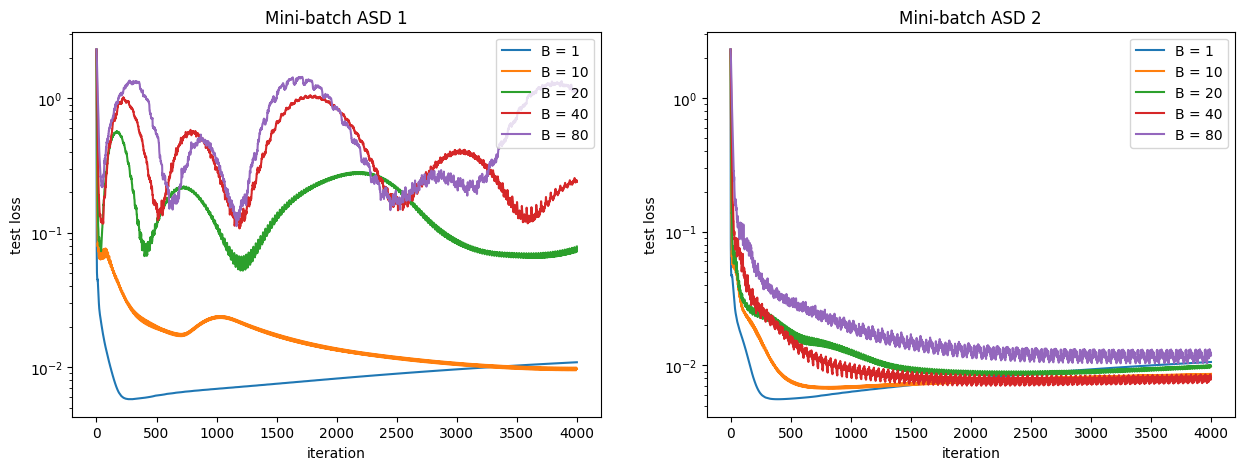

In [ ]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
for i in range(len(asd1_batch_list)):
    ax.semilogy(asd1_batch_list[i][loss_str], label=f"B = {B_list[i]}")
ax.legend(loc="upper right")
ax.set_title("Mini-batch ASD 1")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
loss_str = "test_loss_list"
for i in range(len(asd2_batch_list)):
    ax.semilogy(asd2_batch_list[i][loss_str], label=f"B = {B_list[i]}")
ax.legend(loc="upper right")
ax.set_title("Mini-batch ASD 2")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

### Finding the optimal rank

In [ ]:
file = np.load("CW2.npz")
A = torch.tensor(file["Y"], dtype=torch.float32).reshape((25**2, 49))
true_err_fn = lambda X, Y: completion_err(X, Y, A)
p = 1/3
B = 10
K = 4000
dk = 250
k_test = 250
I = bernoulli(A, p)

In [ ]:
# SGD.
sgd_mean_real_list = []
sgd_sd_real_list = []
for r in range(1,26):
    err_list = []
    print(f"Rank: {r}")
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = optimise(X, Y, A, I, lr=32, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    sgd_mean_real_list.append(np.mean(err_list))
    sgd_sd_real_list.append(np.std(err_list))

In [ ]:
# Adam.
adam_mean_real_list = []
adam_sd_real_list = []
for r in range(1,26):
    err_list = []
    print(f"Rank: {r}")
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = optimise(X, Y, A, I, "adam", lr=0.02, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    adam_mean_real_list.append(np.mean(err_list))
    adam_sd_real_list.append(np.std(err_list))

In [ ]:
# Mini-batch ASD 1.
asd1_mean_real_list = []
asd1_sd_real_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    asd1_mean_real_list.append(np.mean(err_list))
    asd1_sd_real_list.append(np.std(err_list))

In [ ]:
# Mini-batch ASD 2.
asd2_mean_real_list = []
asd2_sd_real_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, db=B//2, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    asd2_mean_real_list.append(np.mean(err_list))
    asd2_sd_real_list.append(np.std(err_list))

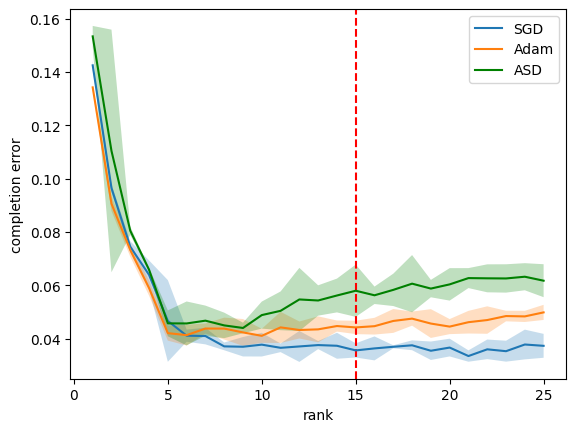

In [ ]:
plt.axvline(x=15, ls='--', c='red')

# SGD
plt.plot(np.arange(1,26),sgd_mean_real_list, label="SGD")
sgd_upper = np.array(sgd_mean_real_list) + 1.96 * np.array(sgd_sd_real_list)
sgd_lower = np.array(sgd_mean_real_list) - 1.96 * np.array(sgd_sd_real_list)
plt.fill_between(np.arange(1,26),sgd_lower, sgd_upper, alpha=0.25)

# Adam
plt.plot(np.arange(1,26),adam_mean_real_list, label="Adam")
adam_upper = np.array(adam_mean_real_list) + 1.96 * np.array(adam_sd_real_list)
adam_lower = np.array(adam_mean_real_list) - 1.96 * np.array(adam_sd_real_list)
plt.fill_between(np.arange(1,26),adam_lower, adam_upper, alpha=0.25)

# Mini-batch ASD 1
plt.plot(np.arange(1,26),asd1_mean_real_list, "m", label="Mini-batch ASD 1")
asd_upper = np.array(asd1_mean_real_list) + 1.96 * np.array(asd1_sd_real_list)
asd_lower = np.array(asd1_mean_real_list) - 1.96 * np.array(asd1_sd_real_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="m", alpha=0.25)

# Mini-batch ASD 2
plt.plot(np.arange(1,26),asd2_mean_real_list, "g", label="ASD")
asd_upper = np.array(asd2_mean_real_list) + 1.96 * np.array(asd2_sd_real_list)
asd_lower = np.array(asd2_mean_real_list) - 1.96 * np.array(asd2_sd_real_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="g", alpha=0.25)

plt.title("Completion error against rank\nwith 95% asymptotic confidence interval")
plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")

#### Saving experiment data

In [ ]:
import json


data = {
    "sgd_mean_list": sgd_mean_list,
    "sgd_sd_list": sgd_sd_list,
    "adam_mean_list": adam_mean_list,
    "adam_sd_list": adam_sd_list,
    "asd1_mean_list": asd1_mean_list,
    "asd1_sd_list": asd1_sd_list,
    "asd2_mean_list": asd2_mean_list,
    "asd2_sd_list": asd2_sd_list,
}

TypeError: dump() missing 1 required positional argument: 'fp'

In [ ]:
data2 = {}
for key, res in data.items():
    res2 = []
    for val in res:
        val2 = float(val)
        res2.append(val2)
    data2[key] = res2

## Recovering synthetic data using continuous matrix completion

In [30]:
n = 175
A = syntheticA(n)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
p = 1/3
r = 2
B = 10
K = 2500
k_test = 250
I = bernoulli(A, p) # Discrete indexing.
I_cont = (I + torch.rand(I.size(0), 2)) # Continuous indexing.
F = syntheticF(I_cont/n) # Sampled values.

In [31]:
# SGD with discrete indexing.
X, Y = initial(A,r) 
res_sgd_syn_cI = optimise(X, Y, F, I, lr=16, loss=mse_loss_cont, true_err_fn=true_err_fn, 
                          B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 0.008430884219706059


In [ ]:
# Adam with discrete indexing.
X, Y = initial(A, r)
res_adam_syn_cI = optimise(X, Y, F, I, "adam", loss=mse_loss_cont, lr=0.01, 
                           true_err_fn=true_err_fn, 
                           B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 0.008441862650215626


In [ ]:
# ASD with discrete indexing.
X, Y = initial(A, r)
res_asd_syn_cI = asd(X, Y, F, I, train_loss_fn=asd_loss_cont, 
                     test_loss_fn=asd_loss_cont, true_err_fn=true_err_fn, 
                     B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 0.008638312108814716


In [ ]:
# SGD with continuous indexing.
X, Y = initial(A,r) 
res_sgd_syn_cX = optimise(X, Y, F, I_cont, lr=16, loss=mse_loss_cont, 
                          true_err_fn=true_err_fn, 
                          B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 1.090730438590981e-05


In [ ]:
# Adam with continuous indexing.
X, Y = initial(A, r)
res_adam_syn_cX = optimise(X, Y, F, I_cont, "adam", lr=0.01, loss=mse_loss_cont, 
                           true_err_fn=true_err_fn, 
                           B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 1.0894041224673856e-05


In [ ]:
# ASD with continuous indexing.
X, Y = initial(A, r)

# Need to implement functions for different learning rates.
res_asd_syn_cX = asd(X, Y, F, I_cont, train_loss_fn=asd_loss_cont, 
                     test_loss_fn=asd_loss_cont, true_err_fn=true_err_fn,
                    lrX_fn=lrX_cont, lrY_fn=lrY_cont, B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 1.1138235095131677e-05


(5e-06, 2)

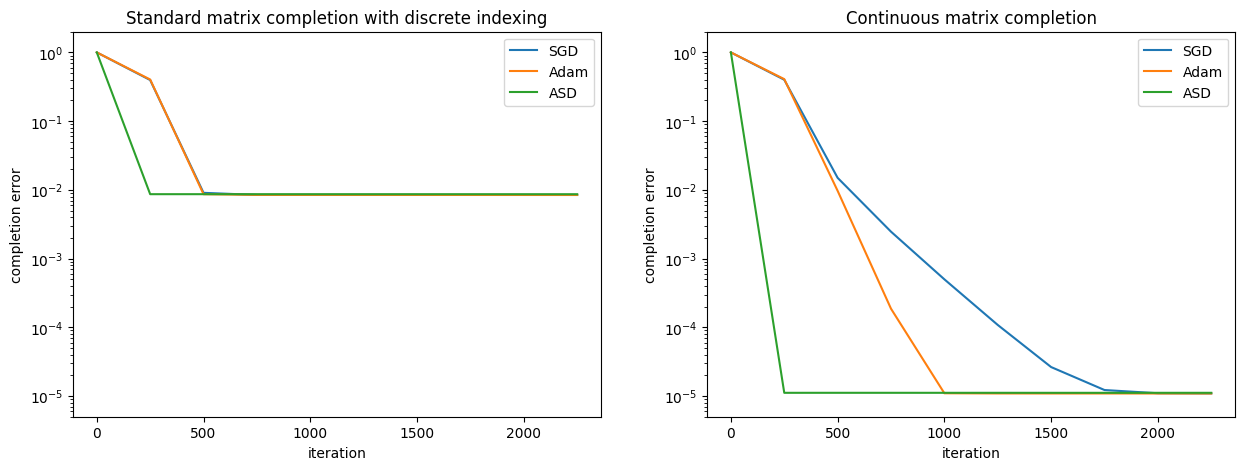

In [37]:
loss_str = "true_err_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.semilogy(np.arange(0, K, k_test), res_sgd_syn_cI[loss_str], label="SGD")
plt.semilogy(np.arange(0, K, k_test), res_adam_syn_cI[loss_str], label="Adam")
plt.semilogy(np.arange(0, K, k_test), res_asd_syn_cI[loss_str], label="ASD")
ax.set_title(f"Standard matrix completion with discrete indexing")
ax.legend(loc="upper right")
ax.set_xlabel("iteration")
ax.set_ylabel("completion error")
ax.set_ylim((5e-6, 2))

ax = fig.add_subplot(1,2,2)
plt.semilogy(np.arange(0, K, k_test), res_sgd_syn_cX[loss_str], label="SGD")
plt.semilogy(np.arange(0, K, k_test), res_adam_syn_cX[loss_str], label="Adam")
plt.semilogy(np.arange(0, K, k_test), res_asd_syn_cX[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Continuous matrix completion")
ax.set_xlabel("iteration")
ax.set_ylabel("completion error")
ax.set_ylim((5e-6, 2))